In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [2]:
import keras
import tensorflow

Using TensorFlow backend.


# Loading the data

In [3]:
dataset= pd.read_csv('sonar (1).csv', header=None)
X=dataset.iloc[:,0:60].values
y=dataset.iloc[:,60].values
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

# Preprocessing the data

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder=LabelEncoder()
y= encoder.fit_transform(y)

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Definition of model

In [11]:
classifier=Sequential()
classifier.add(Dense(units=32, activation='relu', kernel_initializer='uniform', input_dim=60))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compilation of model

In [12]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Fit the specified model

In [13]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
156/156 [==============================] - 2s 10ms/step - loss: 0.6921 - accuracy: 0.6346
Epoch 2/100
156/156 [==============================] - 0s 308us/step - loss: 0.6836 - accuracy: 0.7692
Epoch 3/100
156/156 [==============================] - 0s 308us/step - loss: 0.6563 - accuracy: 0.8077
Epoch 4/100
156/156 [==============================] - 0s 359us/step - loss: 0.5863 - accuracy: 0.7949
Epoch 5/100
156/156 [==============================] - 0s 385us/step - loss: 0.4824 - accuracy: 0.8269
Epoch 6/100
156/156 [==============================] - 0s 333us/step - loss: 0.3871 - accuracy: 0.8462
Epoch 7/100
156/156 [==============================] - 0s 282us/step - loss: 0.3175 - accuracy: 0.8526
Epoch 8/100
156/156 [==============================] - 0s 282us/step - loss: 0.2684 - accuracy: 0.8526
Epoch 9/100
156/156 [==============================] - 0s 282us/step - loss: 0.2412 - accuracy: 0.8910
Epoch 10/100
156/156 [==============================] - 0s 333us/step - l

Epoch 78/100
156/156 [==============================] - 0s 308us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 79/100
156/156 [==============================] - 0s 385us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 80/100
156/156 [==============================] - 0s 461us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 81/100
156/156 [==============================] - 0s 313us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 82/100
156/156 [==============================] - 0s 461us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 83/100
156/156 [==============================] - 0s 282us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 84/100
156/156 [==============================] - 0s 245us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 85/100
156/156 [==============================] - 0s 282us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 86/100
156/156 [==============================] - 0s 590us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 87/100
156/156 [==============================] - 0s 282us

# Evaluation of model

In [14]:
score = classifier.evaluate(X_test,
y_test,
batch_size=32)

52/52 [==============================] - 0s 2ms/step


# Predictions 

In [15]:
y_pred=classifier.predict(X_test)>0.5



# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)


In [17]:
cm

array([[26,  0],
       [ 7, 19]], dtype=int64)

# Saving the model

In [18]:
from keras.models import load_model
classifier.save('model_file.h5')


In [19]:
my_model = load_model('model_file.h5')

In [49]:
from keras.optimizers import RMSprop
opt = RMSprop(lr=0.0001, decay=1e-6)
classifier.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

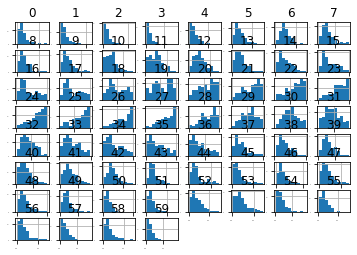

In [50]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

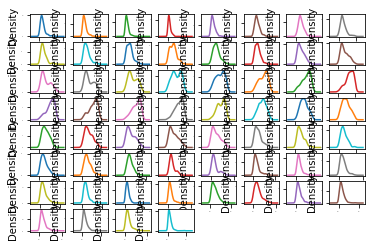

In [51]:
dataset.plot(kind= 'density' , subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1)
plt.show()

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_predict = model.predict(X_test)

In [26]:
y_predict

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

In [27]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0])

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy 

In [29]:
accuracy_score(y_test, y_predict)

0.8846153846153846

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.95      0.81      0.88        26

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_predict = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, r2_score, accuracy_score
from sklearn import metrics

In [36]:
r2_score(y_test,y_predict)

0.31963206786289855

In [37]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0])

In [38]:
y_predict

array([ 0.72041775,  0.32896308,  0.31722082,  0.55944606, -0.15170976,
        0.68079237,  0.25522919, -0.11897105,  0.98109807,  0.44956188,
        0.6064469 ,  0.19264022,  0.47234541,  0.45958435,  0.74432636,
        1.02429627,  0.07543274,  0.79121816,  0.97164878,  1.23100816,
        0.15888325,  1.21291394,  0.43557779,  0.73597824,  0.93791695,
        0.833271  ,  0.3979348 ,  0.21388677,  0.24639779, -0.40431839,
        0.87545884,  0.31428156,  0.35639631,  0.69622975, -0.2247163 ,
        0.2298358 ,  0.07320806,  0.27125896,  1.26670955,  0.33130663,
        0.52900395,  0.61775756,  0.59563361,  0.02160936,  0.53421442,
        0.67032249, -0.13523917, -0.13574458,  0.59795771,  0.58282482,
        0.10090708,  0.62572195])

In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
r2_score(y_test,y_predict)

0.31963206786289855

In [40]:
print(model_lr.intercept_)

0.4551282051282056


In [41]:
predictions = model_lr.predict(X_test)

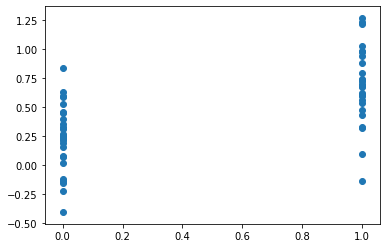

In [42]:
plt.scatter(y_test,predictions)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3412170300708668
MSE: 0.17009198303427536
RMSE: 0.4124220932906909


# Accuracy

In [44]:
accuracy_score(y_test, y_predict.round())

0.7884615384615384

In [45]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.80      0.77      0.78        26

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52

